## Dataset Analysis and Preparation

In [1]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
import cv2
from tqdm import tqdm

#### LABELS
* MEL - Melanoma
* NV - Melanocytic Nevi
* BCC - Basal Cell Carcinoma
* AKIEC - Actinic Keratoses (Solar Keratoses)
* BKL - Benign Keratosis
* DF - Dermatofibroma
* VASC - Vascular Skin Lesions

### Creating Dataset folder structure from CSV

In [2]:
os.mkdir("HAM_Dataset")
base = "HAM_Dataset"

os.mkdir(os.path.join(base, "MEL"))
os.mkdir(os.path.join(base, "NV"))
os.mkdir(os.path.join(base, "BCC"))
os.mkdir(os.path.join(base, "AKIEC"))
os.mkdir(os.path.join(base, "BKL"))
os.mkdir(os.path.join(base, "DF"))
os.mkdir(os.path.join(base, "VASC"))

In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        print(os.listdir(base))

['AKIEC', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'VASC']


In [6]:
mapping = {0:"MEL", 1:"NV", 2:"BCC", 3:"AKIEC", 4:"BKL", 5:"DF", 6:"VASC"}

df_labels = pd.read_csv("C:/Users/pruth/Downloads/GroundTruth.csv")
for i in range(len(df_labels)):
    labels = df_labels.iloc[i,1:]
    df_labels.loc[i,"label"] = mapping[list(labels).index(1)]

df_labels.set_index('image', inplace=True)
df_labels.head()

,MEL,NV,BCC,AKIEC,BKL,DF,VASC,label
image,,,,,,,,
ISIC_0024306,0,1,0,0,0,0,0,NV
ISIC_0024307,0,1,0,0,0,0,0,NV
ISIC_0024308,0,1,0,0,0,0,0,NV
ISIC_0024309,0,1,0,0,0,0,0,NV
ISIC_0024310,1,0,0,0,0,0,0,MEL


In [7]:
nv_idx = df_labels[df_labels['label']=="NV"].index
drop_indices = np.random.choice(nv_idx, 4500, replace=False)
df_labels = df_labels.drop(drop_indices)

In [11]:
HAM_images="C:\Users\pruth\Downloads\dataset\ham10000_combined"
images = os.listdir(HAM_images)

for image in tqdm(images):
    
    try:
        fname=image[:-4]
        label=df_labels.loc[fname, "label"]
        src = os.path.join(HAM_images, image)
        dst = os.path.join('HAM_Dataset', label, image)
        shutil.copyfile(src, dst)
    except:
        continue

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (281543494.py, line 1)

### Frequency count of samples

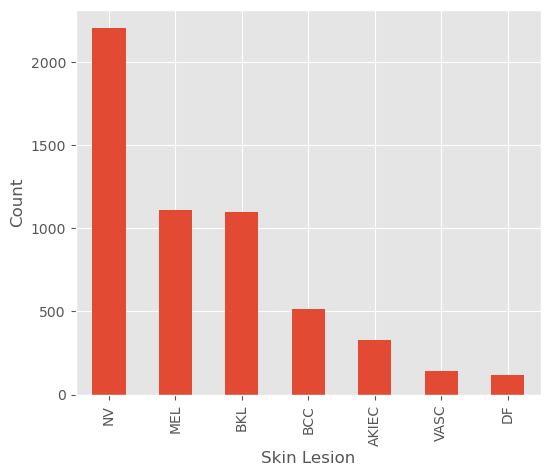

In [12]:
fig, ax1 = plt.subplots(1, 1, figsize = (6, 5))
df_labels['label'].value_counts().plot(kind='bar', ax=ax1)
plt.ylabel('Count')
plt.xlabel('Skin Lesion')
plt.show()

In [15]:
import numpy as np
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.array(['AKIEC', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'VASC']),
    y=df_labels["label"].values
)

class_wt_dict = dict(zip(np.array(['AKIEC', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'VASC']), class_weights))
print(class_wt_dict)


{np.str_('AKIEC'): np.float64(2.4093490607252077), np.str_('BCC'): np.float64(1.5327959977765426), np.str_('BKL'): np.float64(0.7168854803067723), np.str_('DF'): np.float64(6.850931677018633), np.str_('MEL'): np.float64(0.70786805288153), np.str_('NV'): np.float64(0.3573048266925818), np.str_('VASC'): np.float64(5.548289738430584)}


### Data Preparation & Batching

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(rotation_range=180, 
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest',
                               rescale=1./255,
                               validation_split=0.15)

In [21]:
data_dir = 'HAM_Dataset'
batch_size = 10
train_image_gen = image_gen.flow_from_directory(data_dir, 
                                          target_size=(224,224), 
                                          color_mode='rgb',
                                          batch_size=batch_size,
                                          class_mode='categorical',
                                          subset="training")

test_image_gen = image_gen.flow_from_directory(data_dir, 
                                          target_size=(224,224), 
                                          color_mode='rgb',
                                          batch_size=batch_size,
                                          class_mode='categorical',
                                          shuffle=False,
                                          subset="validation")

print(test_image_gen.class_indices)

Found 4691 images belonging to 7 classes.
Found 824 images belonging to 7 classes.
{'AKIEC': 0, 'BCC': 1, 'BKL': 2, 'DF': 3, 'MEL': 4, 'NV': 5, 'VASC': 6}


In [18]:
pip install tensorflow

  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached grpcio-1.75.1-cp313-cp313-win_amd64.whl.metadata (3.8 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.11.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached ml_dtypes-0.5.3-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using c

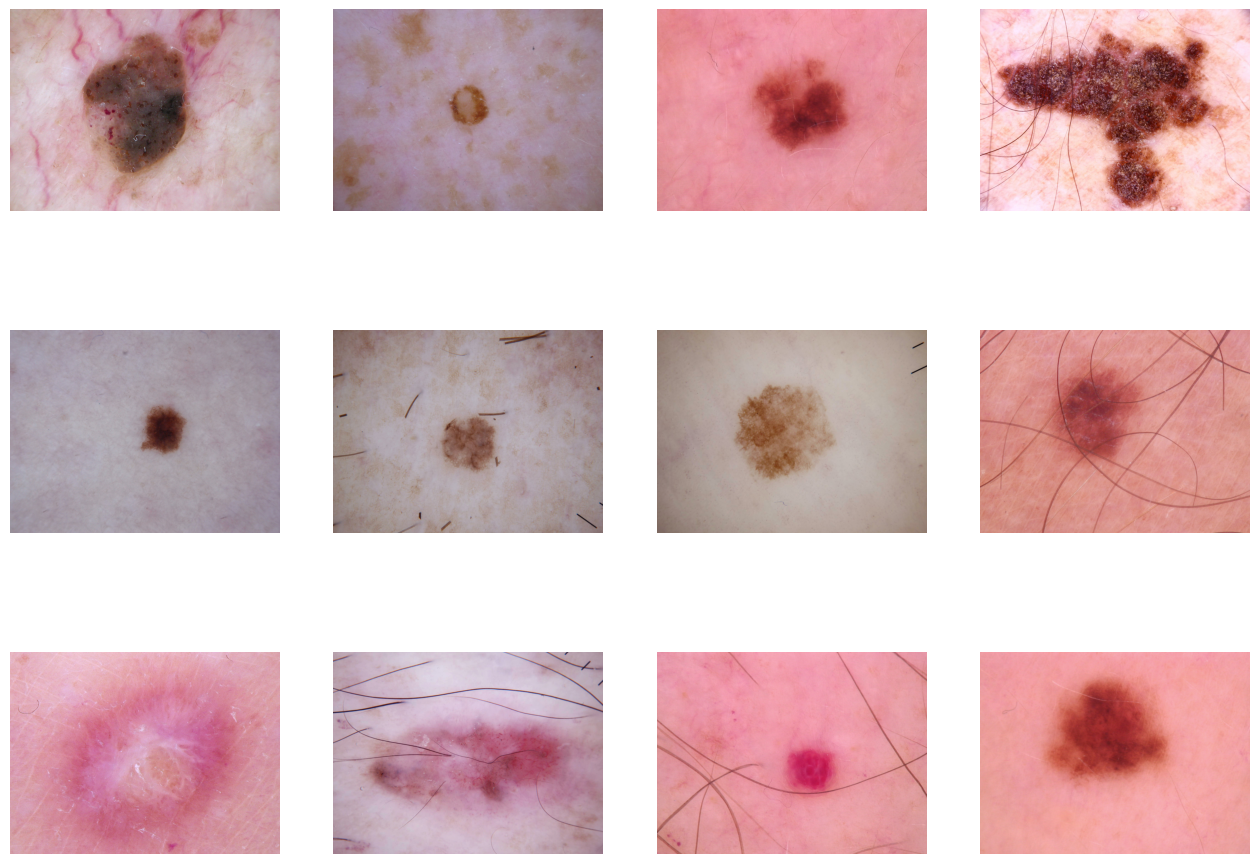

In [25]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to image folder
folder_path = "C:/Users/pruth/Downloads/dataset/ham10000_combined/"

# Get all image file paths
all_images = [os.path.join(folder_path, img) for img in os.listdir(folder_path) if img.endswith(".jpg")]

# Shuffle the list of images
random.shuffle(all_images)

# Plot 12 random images
fig = plt.gcf()
fig.set_size_inches(16, 16)

for i, img_path in enumerate(all_images[0:12]):
    sp = plt.subplot(4, 4, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


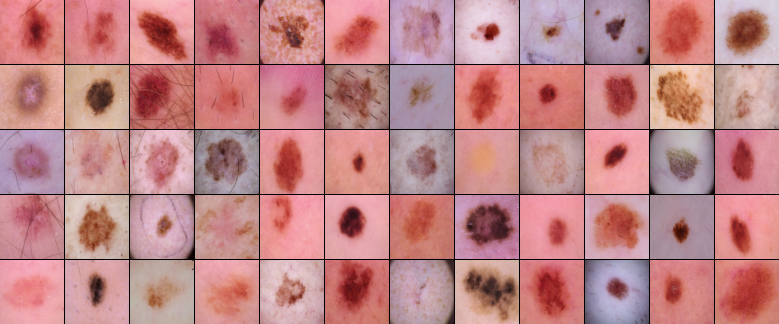

In [ ]:
import tensorflow as tf
import os
import numpy as np
import PIL

# --- Define dataset loader ---
def get_dataset(file_paths, CFG):
    def decode_image(filename):
        img = tf.io.read_file(filename)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, [CFG['img_size'], CFG['img_size']])
        img = img / 255.0
        return img, filename
    ds = tf.data.Dataset.from_tensor_slices(file_paths)
    ds = ds.map(decode_image, num_parallel_calls=tf.data.AUTOTUNE)
    return ds

# --- Example config and file list ---
CFG = {'img_size': 224}
files_train = tf.io.gfile.glob("C:/Users/pruth/Downloads/dataset/ham10000_combined/*.jpg")

# --- FIXED LINE ---
ds = get_dataset(files_train, CFG).take(12*5)
show_dataset(64, 12, 5, ds)


### Data Augmentation

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(
    rotation_range=180, 
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    rescale=1./255,
    validation_split=0.15
)

batch_size = 16
train_image_gen = image_gen.flow_from_directory(
    'C:/Users/pruth/Downloads/project3/HAM_Dataset',
    target_size=(224,224),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical'
)


Found 5515 images belonging to 7 classes.


In [45]:
fig = plt.gcf()
fig.set_size_inches(6, 6)

# next_pix = image_path
# random.shuffle(next_pix)
for i, img in enumerate(imgs):
    sp = plt.subplot(4, 4, i + 1)
    sp.axis('Off')
    plt.imshow(img)

plt.tight_layout()
plt.show()

NameError: name 'imgs' is not defined

<Figure size 600x600 with 0 Axes>